# Programación genética

![](https://upload.wikimedia.org/wikipedia/commons/7/77/Genetic_Program_Tree.png)
Fuente: wikipedia

![](https://www.researchgate.net/profile/Mohammed-El-Telbany/publication/4113357/figure/fig1/AS:279938642006020@1443753981702/Genetic-programming-operators-a-mutation-b-crossover.png)
Fuente: researchgate

In [9]:
!pip3 install gplearn
# !pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

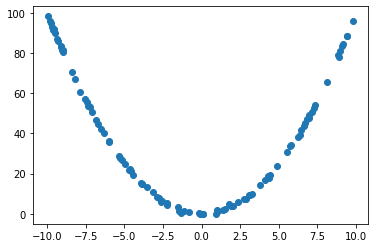

In [11]:
# Training samples
X_train = np.random.uniform(-10,10,100).reshape(-1,1)
y_train = X_train**2 + 0.5*np.random.randn(100).reshape(-1,1)

# y_train = X_train**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_train, y_train, color='tab:blue')
plt.show()

In [12]:
y_train = y_train.reshape(100,)

In [13]:
est_gp = SymbolicRegressor(population_size=500,
                           generations=30, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    46.66           206180        7         0.795583         0.396336     10.80s
   1    34.34          225.782       35         0.401782         0.637232      8.40s
   2    15.92          39.6863        3         0.395399         0.694742      6.33s
   3     5.34          38.3675        3         0.394621         0.701742      4.80s
   4     3.34          40.7601        3          0.38662         0.773751      4.56s
   5     3.44          36.5896        3         0.388623         0.755728      4.84s
   6     3.15          44.4503        3         0.387127         0.769192      4.28s
   7     3.18          37.8881        3         0.388627         0.755694      4.08s
   8     3.29          285.169        3         0.391107         0.733372  

SymbolicRegressor(generations=30, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [16]:
print(est_gp._program)

mul(X0, X0)


In [ ]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph

### Ejercicio: Generar datos con ruido a partir de una función, proponer otras gramáticas y correr el algoritmo de programación genética.